# YanuX Cruncher Playground Notebook #

## Import Libraries ##

In [1]:
%matplotlib inline

import sys                            #System-specific parameters and functions
import math                           #Mathematical functions
import scipy as sp                    #SciPy
import numpy as np                    #NumPy
import pandas as pd                   #Pandas
import matplotlib.pyplot as plt       #Matplotlib

import seaborn as sns                 #Seaborn
sns.despine()

## Loading Data ##

### Load the model classes ###

A class responsible for loading a JSON file (or all the JSON files in a given directory) into a Python dictionary

In [2]:
from model.jsonloader import JsonLoader

A class that takes a set of Python dictionaries containing Wi-Fi logging data loaded from JSON files collected by the YanuX Scavenger Android application

In [3]:
from model.wifi import WifiLogs

#### Load data from the JSON files into Python objects ####

Load all files from the *data* folder.
The logs currently placed there were collected using the **Yanux Scavenger** Android application on April 28<sup>th</sup>, 2016 using an LG Nexus 5 running Androdid Marshmallow 6.0.1

In [4]:
json_loader = JsonLoader('data')
wifi_logs = WifiLogs(json_loader.json_data)

## Wi-Fi Readings ##

Number of Recorded Samples per Location

In [5]:
num_samples_per_location = int(len(wifi_logs.wifi_samples()) / len(wifi_logs.locations))
num_samples_per_location

40

Defining how much of the data will be used for training and for testing

In [6]:
train_test_data_ratio = 0.60 # 60% of the data will be used for training. The rest will be used for testing.
train_test_data_split_index = int(num_samples_per_location * train_test_data_ratio)
train_test_data_split_index

24

Shuffle data to remove any bias that measuring order may have introduced.
This is mainly relevant because part of the data will be used for training while the rest will be used for testing.

In [7]:
wifi_logs.shuffle_samples()

Convert the structured data that came from the JSON logs into a Pandas DataFrame.

In [8]:
wifi_results = pd.DataFrame(wifi_logs.wifi_results(0, train_test_data_split_index),
                                                  columns=["filename", "x", "y", "floor",
                                                           "sample_id", "mac_address", "signal_strength"])

Export everything to a CSV file so that you can play with it more easily on other software tools (e.g., Excel)

In [9]:
wifi_results.to_csv("wifi_results.csv")

The whole table of unstructured Wi-Fi results

In [10]:
wifi_results

,filename,x,y,floor,sample_id,mac_address,signal_strength
0,"altPoint(27,10).json",13.5,5.0,2,6,00:15:f9:6c:7d:71,-54
1,"altPoint(27,10).json",13.5,5.0,2,6,00:11:21:6c:4e:72,-77
2,"altPoint(27,10).json",13.5,5.0,2,6,00:11:21:6c:4e:71,-76
3,"altPoint(27,10).json",13.5,5.0,2,6,00:11:21:6c:4e:70,-78
4,"altPoint(27,10).json",13.5,5.0,2,6,00:15:f9:6c:7d:70,-55
5,"altPoint(27,10).json",13.5,5.0,2,6,00:15:f9:6c:7d:72,-55
6,"altPoint(27,10).json",13.5,5.0,2,6,00:12:da:9e:32:31,-56
7,"altPoint(27,10).json",13.5,5.0,2,6,00:12:da:9e:32:30,-55
8,"altPoint(27,10).json",13.5,5.0,2,6,00:12:da:9e:32:32,-55
9,"altPoint(27,10).json",13.5,5.0,2,6,00:15:f9:6c:7a:e0,-81


Number of Results

In [11]:
len(wifi_results)

10403

Number of Unique Mac Addresses

In [12]:
mac_addresses = wifi_results.mac_address.unique()
len(wifi_results.mac_address.unique())

39

Signal Strength Mean

In [13]:
wifi_results.signal_strength.mean()

-71.81101605306162

Signal Strength Standard Deviation

In [14]:
wifi_results.signal_strength.std()

12.099315264718802

## Some Data Set Statistics ###

### How often has each Access Point been detected ####

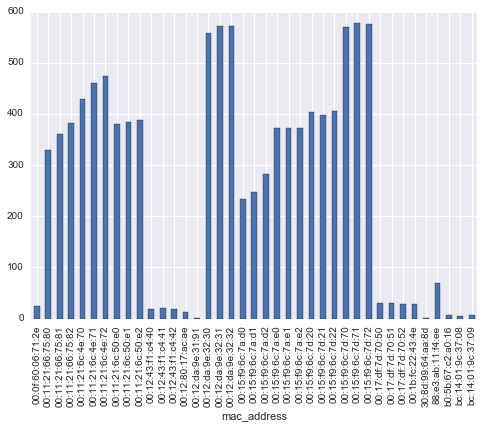

In [15]:
wifi_results_mac_address_group = wifi_results.groupby("mac_address")
wifi_results_mac_address_group.size().plot(kind="bar")

In [16]:
wifi_results_mac_address_group.size()

mac_address
00:0f:60:06:71:2e     25
00:11:21:66:75:80    329
00:11:21:66:75:81    360
00:11:21:66:75:82    383
00:11:21:6c:4e:70    429
00:11:21:6c:4e:71    460
00:11:21:6c:4e:72    475
00:11:21:6c:50:e0    381
00:11:21:6c:50:e1    385
00:11:21:6c:50:e2    388
00:12:43:f1:c4:40     18
00:12:43:f1:c4:41     20
00:12:43:f1:c4:42     18
00:12:80:17:ac:ae     13
00:12:da:9e:31:91      2
00:12:da:9e:32:30    559
00:12:da:9e:32:31    571
00:12:da:9e:32:32    572
00:15:f9:6c:7a:d0    233
00:15:f9:6c:7a:d1    247
00:15:f9:6c:7a:d2    283
00:15:f9:6c:7a:e0    372
00:15:f9:6c:7a:e1    372
00:15:f9:6c:7a:e2    372
00:15:f9:6c:7d:20    403
00:15:f9:6c:7d:21    398
00:15:f9:6c:7d:22    405
00:15:f9:6c:7d:70    570
00:15:f9:6c:7d:71    577
00:15:f9:6c:7d:72    576
00:17:df:7d:70:50     30
00:17:df:7d:70:51     31
00:17:df:7d:70:52     29
00:1b:fc:22:43:4e     29
30:8d:99:64:aa:8d      2
88:e3:ab:11:f4:ee     69
b0:5b:67:c2:a0:16      6
bc:14:01:9c:37:08      5
bc:14:01:9c:37:09      6
dtype: int64

### How many times Wi-Fi results were gathered at each location ###

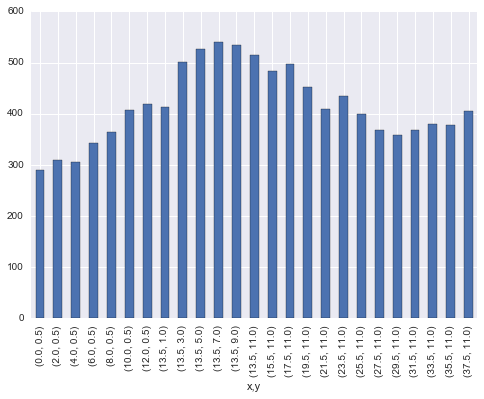

In [17]:
wifi_results_coord_group = wifi_results.groupby(["x", "y"])
wifi_results_coord_group.size().plot(kind="bar")

In [18]:
wifi_results_coord_group.size()

x     y   
0.0   0.5     289
2.0   0.5     310
4.0   0.5     306
6.0   0.5     343
8.0   0.5     364
10.0  0.5     407
12.0  0.5     419
13.5  1.0     413
      3.0     501
      5.0     526
      7.0     540
      9.0     534
      11.0    515
15.5  11.0    484
17.5  11.0    497
19.5  11.0    453
21.5  11.0    409
23.5  11.0    435
25.5  11.0    400
27.5  11.0    369
29.5  11.0    359
31.5  11.0    368
33.5  11.0    379
35.5  11.0    378
37.5  11.0    405
dtype: int64

## Wi-Fi Samples ##

### Training Data ###

Loading Wi-Fi Samples into a DataFrame. Aside the *filename*, *x*, *y*, *floor* and *sample_id* columns, the other ones correspond to the measured signal strength of Access Points whenever a sample was taken by the **YanuX Scavenger** application. 

Note that whenever an Access Point is not detected, the signal strength value has been replaced by the lowest possible value that can be represented by Python floating point number.

It should also be noted that only a portion of the data set is being loaded here, since the remaining will be used as test data.

In [19]:
wifi_samples_columns = ["filename", "x", "y", "floor", "sample_id"]
wifi_samples_columns.extend(mac_addresses)
wifi_samples = pd.DataFrame(wifi_logs.wifi_samples(0,train_test_data_split_index), columns=wifi_samples_columns)
wifi_samples = wifi_samples.fillna(sys.float_info.min)
wifi_samples.to_csv("wifi_samples.csv")
wifi_samples

,filename,x,y,floor,sample_id,00:15:f9:6c:7d:71,00:11:21:6c:4e:72,00:11:21:6c:4e:71,00:11:21:6c:4e:70,00:15:f9:6c:7d:70,...,00:12:80:17:ac:ae,00:1b:fc:22:43:4e,30:8d:99:64:aa:8d,00:12:43:f1:c4:41,00:12:43:f1:c4:42,b0:5b:67:c2:a0:16,bc:14:01:9c:37:08,bc:14:01:9c:37:09,00:12:43:f1:c4:40,00:12:da:9e:31:91
0,"altPoint(27,10).json",13.5,5.0,2,6,-54.0,-77.0,-7.600000e+01,-7.800000e+01,-55.0,...,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308
1,"altPoint(27,10).json",13.5,5.0,2,9,-54.0,-79.0,-7.800000e+01,-7.800000e+01,-53.0,...,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308
2,"point(27,10).json",13.5,5.0,2,18,-50.0,-80.0,-8.100000e+01,-8.000000e+01,-65.0,...,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308
3,"altPoint(27,10).json",13.5,5.0,2,15,-50.0,-79.0,-7.900000e+01,-7.900000e+01,-49.0,...,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308
4,"point(27,10).json",13.5,5.0,2,10,-49.0,-79.0,-8.100000e+01,-8.100000e+01,-50.0,...,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308
5,"altPoint(27,10).json",13.5,5.0,2,11,-54.0,-80.0,-8.000000e+01,-8.000000e+01,-55.0,...,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308
6,"altPoint(27,10).json",13.5,5.0,2,12,-48.0,-79.0,-8.000000e+01,-7.900000e+01,-48.0,...,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308
7,"altPoint(27,10).json",13.5,5.0,2,16,-47.0,-78.0,-7.600000e+01,-7.900000e+01,-46.0,...,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308
8,"altPoint(27,10).json",13.5,5.0,2,2,-55.0,-78.0,-8.200000e+01,-7.800000e+01,-55.0,...,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308
9,"point(27,10).json",13.5,5.0,2,6,-50.0,-81.0,-7.900000e+01,-8.400000e+01,-50.0,...,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308


### Import the K nearest neighbors algorithm from *scikit-learn* ###

In [20]:
from sklearn.neighbors import KNeighborsRegressor

Initialize the *KNeighborsRegressor* and train it using the signal strength for each of the Access Points' MAC Addresses as the training data and setting the *x*, *y* coordinates as the columns to be predicted.

***KNeighborsRegressor*** is configured with
- n_neighbors=5       (the number of neighbours)
- weights="distance"  (give more weight to closer neighbors)
- algorithm="brute"   (there's no need for optimizations with such a small data set)

In [21]:
knn = KNeighborsRegressor(n_neighbors=5,
                          weights='distance',
                          algorithm='brute')
coord_cols = ["x","y"]
knn.fit(wifi_samples[mac_addresses], wifi_samples[coord_cols])

KNeighborsRegressor(algorithm='brute', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='distance')

### Load the Testing Data ###
Just load the rest of the data set into a DataFrame following the same format used for the training data.

In [22]:
wifi_samples_test = pd.DataFrame(wifi_logs.wifi_samples(train_test_data_split_index,num_samples_per_location), columns=wifi_samples_columns)
wifi_samples_test = wifi_samples_test.fillna(sys.float_info.min)
wifi_samples_test.to_csv("wifi_samples_test.csv")
wifi_samples_test

,filename,x,y,floor,sample_id,00:15:f9:6c:7d:71,00:11:21:6c:4e:72,00:11:21:6c:4e:71,00:11:21:6c:4e:70,00:15:f9:6c:7d:70,...,00:12:80:17:ac:ae,00:1b:fc:22:43:4e,30:8d:99:64:aa:8d,00:12:43:f1:c4:41,00:12:43:f1:c4:42,b0:5b:67:c2:a0:16,bc:14:01:9c:37:08,bc:14:01:9c:37:09,00:12:43:f1:c4:40,00:12:da:9e:31:91
0,"altPoint(27,10).json",13.5,5.0,2,8,-55.0,-78.0,-7.700000e+01,-7.600000e+01,-53.0,...,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308
1,"point(27,10).json",13.5,5.0,2,1,-50.0,-78.0,2.225074e-308,-8.000000e+01,-49.0,...,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308
2,"point(27,10).json",13.5,5.0,2,5,-64.0,-80.0,-7.900000e+01,-8.000000e+01,-64.0,...,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308
3,"point(27,10).json",13.5,5.0,2,13,-49.0,-80.0,-8.200000e+01,-8.300000e+01,-50.0,...,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308
4,"altPoint(27,10).json",13.5,5.0,2,4,-53.0,-77.0,-7.700000e+01,-7.700000e+01,-55.0,...,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308
5,"point(27,10).json",13.5,5.0,2,15,-53.0,-85.0,-7.600000e+01,-7.700000e+01,-52.0,...,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308
6,"altPoint(27,10).json",13.5,5.0,2,1,-53.0,-79.0,-8.200000e+01,-7.800000e+01,-54.0,...,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308
7,"altPoint(27,10).json",13.5,5.0,2,13,-47.0,-76.0,-7.800000e+01,-7.800000e+01,-47.0,...,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308
8,"point(27,10).json",13.5,5.0,2,2,-49.0,-77.0,-8.100000e+01,2.225074e-308,-50.0,...,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308
9,"altPoint(27,10).json",13.5,5.0,2,10,-54.0,-79.0,-7.800000e+01,-8.000000e+01,-54.0,...,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308


Use the K nearest neighbor regressor to predict the location of the testing data and place the results into a DataFrame for further analysis.

In [23]:
predicted_coord_cols = ["x_predicted","y_predicted"]
predictions = pd.DataFrame(knn.predict(wifi_samples_test[mac_addresses]), columns = predicted_coord_cols)
predictions

,x_predicted,y_predicted
0,13.500000,9.020779
1,13.500000,8.985699
2,13.500000,3.168646
3,13.908665,9.391726
4,13.500000,6.994305
5,13.500000,6.651296
6,13.500000,5.394646
7,13.500000,6.660686
8,13.500000,4.296988
9,13.500000,6.272201


** Coefficient of determination R^2 of the prediction **
[Check the Documentation](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor.score).


In [24]:
knn.score(wifi_samples_test[mac_addresses],predictions)

1.0

### Result Analysis ###

Compare the predictions with the ground truth by building a new DataFrame by concatenating the true positions with the predict positions.

Compute the error for each coordinate (*x* and *y*) and than compute the euclidean distance (the distance in meters) between the actual location and the predicted location.

In [25]:
results = pd.concat([wifi_samples_test[coord_cols], predictions], axis=1)
results["x_error"] = results["x"] - results["x_predicted"]
results["y_error"] = results["y"] - results["y_predicted"]
results["euclidean_distance_error"] = (results["x_error"]**2 + results["y_error"]**2).apply(np.sqrt) 
results

,x,y,x_predicted,y_predicted,x_error,y_error,euclidean_distance_error
0,13.5,5.0,13.500000,9.020779,0.000000e+00,-4.020779e+00,4.020779e+00
1,13.5,5.0,13.500000,8.985699,-1.776357e-15,-3.985699e+00,3.985699e+00
2,13.5,5.0,13.500000,3.168646,3.552714e-15,1.831354e+00,1.831354e+00
3,13.5,5.0,13.908665,9.391726,-4.086654e-01,-4.391726e+00,4.410699e+00
4,13.5,5.0,13.500000,6.994305,-3.552714e-15,-1.994305e+00,1.994305e+00
5,13.5,5.0,13.500000,6.651296,-1.776357e-15,-1.651296e+00,1.651296e+00
6,13.5,5.0,13.500000,5.394646,1.776357e-15,-3.946461e-01,3.946461e-01
7,13.5,5.0,13.500000,6.660686,3.552714e-15,-1.660686e+00,1.660686e+00
8,13.5,5.0,13.500000,4.296988,-1.776357e-15,7.030121e-01,7.030121e-01
9,13.5,5.0,13.500000,6.272201,-1.776357e-15,-1.272201e+00,1.272201e+00


#### Euclidean distance error mean, standard deviation, minimum, maximum and multiple percentiles ####

In [26]:
results["euclidean_distance_error"].describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

count    4.000000e+02
mean     8.571483e-01
std      1.207931e+00
min      0.000000e+00
25%      3.552714e-15
50%      4.134196e-01
75%      1.166598e+00
90%      2.145323e+00
95%      3.322485e+00
99%      5.266452e+00
max      8.485281e+00
Name: euclidean_distance_error, dtype: float64

### Metrics###

Importing *scikit-learn* metrics package

In [27]:
import sklearn.metrics

##### R<sup>2</sup> Score #####

Coordinates

In [28]:
sklearn.metrics.r2_score(wifi_samples_test[coord_cols], predictions, multioutput="uniform_average")

0.97480408802316609

In [29]:
sklearn.metrics.r2_score(wifi_samples_test[coord_cols], predictions, multioutput="variance_weighted")

0.98310337813979387

In [30]:
sklearn.metrics.r2_score(wifi_samples_test[coord_cols], predictions, multioutput="raw_values")

array([ 0.98752595,  0.96208223])

#### Mean Absolute Error ####

Coordinates

In [31]:
sklearn.metrics.mean_absolute_error(wifi_samples_test[coord_cols], predictions, multioutput="uniform_average")

0.44094465916174141

In [32]:
sklearn.metrics.mean_absolute_error(wifi_samples_test[coord_cols], predictions, multioutput="raw_values")

array([ 0.60715346,  0.27473586])

#### Mean Squared Error ####

Coordinates

In [33]:
sklearn.metrics.mean_squared_error(wifi_samples_test[coord_cols], predictions, multioutput="uniform_average")

1.0950768214087061

In [34]:
sklearn.metrics.mean_squared_error(wifi_samples_test[coord_cols], predictions, multioutput="raw_values")

array([ 1.33585104,  0.85430261])

#### Explained Variance Score ####

Coordinates

In [35]:
sklearn.metrics.explained_variance_score(wifi_samples_test[coord_cols], predictions, multioutput="uniform_average")

0.97496056270724107

In [36]:
sklearn.metrics.explained_variance_score(wifi_samples_test[coord_cols], predictions, multioutput="variance_weighted")

0.98336064337442541

In [37]:
sklearn.metrics.explained_variance_score(wifi_samples_test[coord_cols], predictions, multioutput="raw_values")

array([ 0.98783692,  0.9620842 ])